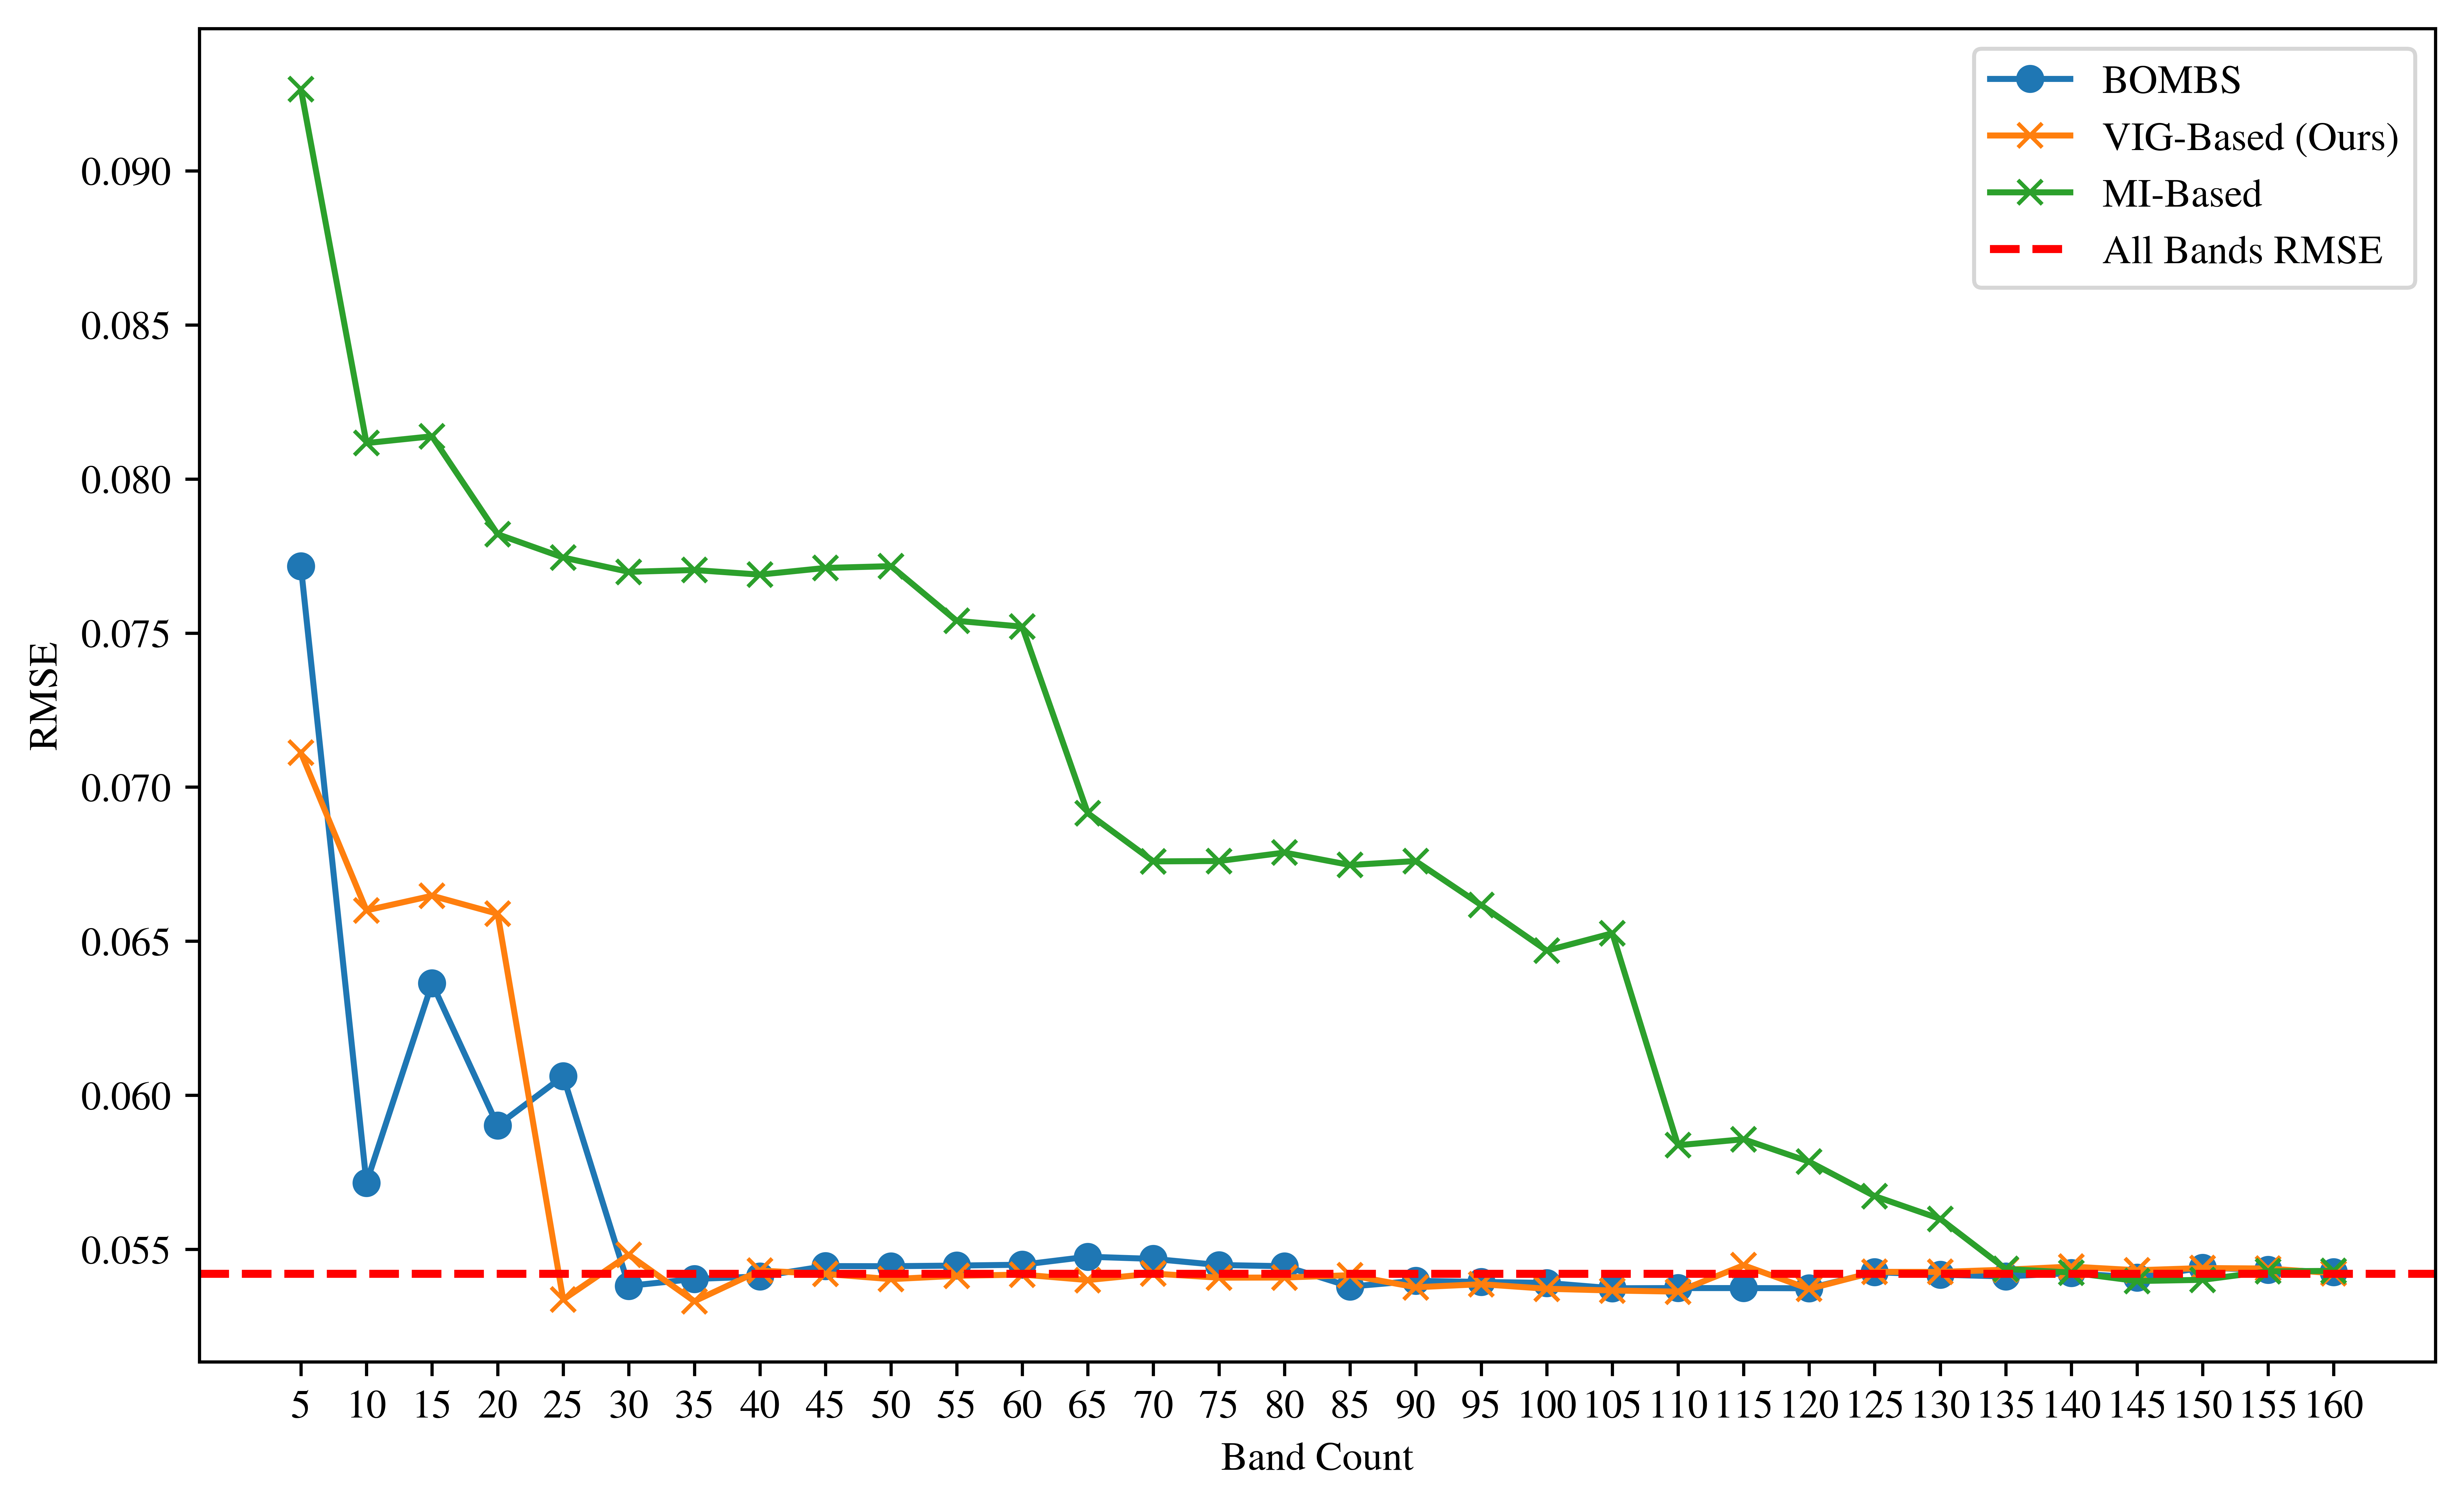

In [4]:
bombs_dir = "bombs/results_test_frac_0-9_estimators_4"
mi_dir = "mi/results_test_frac_0-9_estimators_4"
vig_dir = "results_test_frac_0-9_estimators_4"

import pandas as pd
import numpy as np

global_mse_vig_results = []
global_mse_bombs_results = []
global_mse_mi_results = []

for n_bands in range(5, 161, 5):
    mse_bombs_results, mse_vig_results, mse_mi_results = [], [], []
    for i in range(5):
        b = pd.read_csv(
            f"{bombs_dir}/n_clusters-{n_bands},test_size-0.9,random_state-{i}.csv"
        )
        v = pd.read_csv(
            f"{vig_dir}/n_clusters-{n_bands},test_size-0.9,random_state-{i}.csv"
        )
        m = pd.read_csv(
            f"{mi_dir}/n_clusters-{n_bands},test_size-0.9,random_state-{i}.csv"
        )

        mse_bombs_results.append(b["mse_mean"].item())
        mse_vig_results.append(v["mse_mean"].item())
        mse_mi_results.append(m["mse_mean"].item())

    global_mse_bombs_results.append(np.mean(mse_bombs_results).item())
    global_mse_vig_results.append(np.mean(mse_vig_results).item())
    global_mse_mi_results.append(np.mean(mse_mi_results).item())


import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

# Increase size and quality
fig, ax = plt.subplots(figsize=(10, 6), dpi=1000)

# Create the line plot
ax.plot(
    list(range(5, 161, 5)),
    np.sqrt(global_mse_bombs_results),
    label=r"BOMBS",
    marker="o",
)
ax.plot(
    list(range(5, 161, 5)),
    np.sqrt(global_mse_vig_results),
    label=r"VIG-Based (Ours)",
    marker="x",
)
ax.plot(
    list(range(5, 161, 5)),
    np.sqrt(global_mse_mi_results),
    label=r"MI-Based",
    marker="x",
)


all_bands_mse = np.mean(
    [
        pd.read_csv(
            f"results_test_frac_0-9_estimators_4/n_clusters-all,test_size-0.9,random_state-{i}.csv"
        )["mse_mean"].item()
        for i in range(5)
    ]
)
plt.axhline(
    y=np.sqrt(all_bands_mse),
    color="red",
    linestyle="--",
    linewidth=2,
    label="All Bands RMSE",
)

# Add labels and legend
ax.set_xlabel("Band Count")
ax.set_ylabel("RMSE")
ax.legend()

# Save the plot to a file (optional)
plt.savefig("RMSE_plot.png", bbox_inches="tight")
plt.xticks(list(range(5, 161, 5)))
# Show the plot
plt.show()